In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
with open("./data/date.txt", encoding = 'utf-8') as f:
    date = f.read().split(" ")

In [3]:
fp = './turkey_map/tur_polbnda_adm1.shp'

In [4]:
map_df = gpd.read_file(fp)

In [5]:
# Inspecting
map_df.head()

,adm1_tr,adm1_en,adm1,Shape_Leng,Shape_Area,adm0_en,adm0_tr,adm0,geometry
0,ADANA,ADANA,TUR001,8.271786,1.407083,TURKEY,TÜRKİYE,TUR,"POLYGON ((36.31587 38.36376, 36.31769 38.36367..."
1,ADIYAMAN,ADIYAMAN,TUR002,5.494422,0.750561,TURKEY,TÜRKİYE,TUR,"POLYGON ((39.25297 38.18188, 39.25334 38.18159..."
2,AFYONKARAHİSAR,AFYONKARAHISAR,TUR003,7.149996,1.450064,TURKEY,TÜRKİYE,TUR,"POLYGON ((31.14797 39.26246, 31.15825 39.25753..."
3,AĞRI,AGRI,TUR004,6.588304,1.163170,TURKEY,TÜRKİYE,TUR,"POLYGON ((43.28706 40.01281, 43.29129 40.00884..."
4,AKSARAY,AKSARAY,TUR068,4.432509,0.790388,TURKEY,TÜRKİYE,TUR,"POLYGON ((33.96446 39.03804, 33.96453 39.03723..."


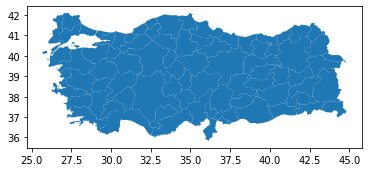

In [6]:
map_df.plot();

In [7]:
data = pd.read_csv("./data/19_june_vaccination_data.csv")
tr_population = pd.read_excel('./data/tr-population-by-years.xls')

In [8]:
display(data.head())
display(tr_population.head())

,city,total,first_,second_
0,adana,973771,630285,343486
1,adıyaman,215490,140084,75406
2,afyon,377017,242161,134856
3,ağrı,116312,78544,37768
4,amasya,230128,145523,84605


,Category,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Toplam-Total,64729501,65603160.0,66401851.0,67187251.0,68010215.0,68860539.0,69729967.0,70586256,71517100,...,74724269,75627384,76667864,77695904,78741053,79814871,80810525,82003882,83154997,83614362
1,Adana,1879695,1899324.0,1916637.0,1933428.0,1951142.0,1969512.0,1988277.0,2006650,2026319,...,2108805,2125635,2149260,2165595,2183167,2201670,2216475,2220125,2237940,2258718
2,Adıyaman,568432,571180.0,573149.0,574886.0,576808.0,578852.0,580926.0,582762,585067,...,593931,595261,597184,597835,602774,610484,615076,624513,626465,632459
3,Afyonkarahisar,696292,698029.0,698773.0,699193.0,699794.0,700502.0,701204.0,701572,697365,...,698626,703948,707123,706371,709015,714523,715693,725568,729483,736912
4,Ağrı,519190,521514.0,523123.0,524514.0,526070.0,527732.0,529417.0,530879,532180,...,555479,552404,551177,549435,547210,542255,536285,539657,536199,535435


In [9]:
df_city_populations = tr_population.iloc[1:, [0,21]] # Filtering the columns [city, 2020]
df_city_populations.columns = ['city', 2020] # Updating the column name

# Updating the city names
df_city_populations.city = df_city_populations.city.str.replace('İ', 'I')
df_city_populations.city = df_city_populations.city.str.replace('ı', 'i')

df_city_populations.city = df_city_populations.city.str.replace('Ğ', 'G')
df_city_populations.city = df_city_populations.city.str.replace('ğ', 'g')

df_city_populations.city = df_city_populations.city.str.replace('ü', 'u')
df_city_populations.city = df_city_populations.city.str.replace('Ü', 'U')

df_city_populations.city = df_city_populations.city.str.replace('ö', 'o')
df_city_populations.city = df_city_populations.city.str.replace('Ö', 'O')

df_city_populations.city = df_city_populations.city.str.replace('ş', 's')
df_city_populations.city = df_city_populations.city.str.replace('Ş', 'S')

df_city_populations.city = df_city_populations.city.str.replace('ç', 'c')
df_city_populations.city = df_city_populations.city.str.replace('Ç', 'C')

In [10]:
# Updating the city names
data.city = data.city.str.replace('İ', 'I')
data.city = data.city.str.replace('ı', 'i')

data.city = data.city.str.replace('Ğ', 'G')
data.city = data.city.str.replace('ğ', 'g')

data.city = data.city.str.replace('ü', 'u')
data.city = data.city.str.replace('Ü', 'U')

data.city = data.city.str.replace('ö', 'o')
data.city = data.city.str.replace('Ö', 'O')

data.city = data.city.str.replace('ş', 's')
data.city = data.city.str.replace('Ş', 'S')

data.city = data.city.str.replace('ç', 'c')
data.city = data.city.str.replace('Ç', 'C')

In [11]:
data.head()

,city,total,first_,second_
0,adana,973771,630285,343486
1,adiyaman,215490,140084,75406
2,afyon,377017,242161,134856
3,agri,116312,78544,37768
4,amasya,230128,145523,84605


In [12]:
# Formatting the city names
df_city_populations.city = df_city_populations.city.str.upper()
data.city = data.city.str.upper()

In [13]:
# Updating a specific value for making both value same for both data
data.city[data.city == 'AFYON'] = 'AFYONKARAHISAR'
data.city[data.city == 'İSTANBUL'] = 'ISTANBUL'
data.city[data.city == 'İZMİR'] = 'IZMIR'

In [14]:
# Checking if there is different values in city column for both data
for i,j in zip(df_city_populations.city, data.city):
    if i != j:
        print(i, j)

In [15]:
# Checking the shape of the both data
print(data.shape)
print(df_city_populations.shape)

(81, 4)
(81, 2)


In [16]:
# Merging two data frames on the city column
df = data.merge(df_city_populations)

In [17]:
# Creating a dataframe that contains the total column values for Turkey general
total_df = pd.DataFrame({'city': 'total', 'first_': df.iloc[:,1].sum(), 'second_': df.iloc[:,2].sum(), 2020: df.iloc[:,3].sum()}, index=[0])
total_df

,city,first_,second_,2020
0,total,40840929,26505406,14335523


In [18]:
display(df.head())

,city,total,first_,second_,2020
0,ADANA,973771,630285,343486,2258718
1,ADIYAMAN,215490,140084,75406,632459
2,AFYONKARAHISAR,377017,242161,134856,736912
3,AGRI,116312,78544,37768,535435
4,AMASYA,230128,145523,84605,335494


In [19]:
# Percentage column for every city, (Second * 100 / Total)
percentage = round((df['second_'] * 100) / df[2020], 2)

In [20]:
df['percentage'] = percentage

In [21]:
display(df.head())

,city,total,first_,second_,2020,percentage
0,ADANA,973771,630285,343486,2258718,15.21
1,ADIYAMAN,215490,140084,75406,632459,11.92
2,AFYONKARAHISAR,377017,242161,134856,736912,18.30
3,AGRI,116312,78544,37768,535435,7.05
4,AMASYA,230128,145523,84605,335494,25.22


In [22]:
# Final dataframe, columns that i need only
asilananlar_df = df[['city', 'percentage']]

In [23]:
# Making city names equivalent
asilananlar_df.city = asilananlar_df.city.copy().str.upper()

In [24]:
display(asilananlar_df.head())

,city,percentage
0,ADANA,15.21
1,ADIYAMAN,11.92
2,AFYONKARAHISAR,18.30
3,AGRI,7.05
4,AMASYA,25.22


In [25]:
# Joining the geodataframe with the cleaned up dataframe
merged = map_df.set_index('adm1_en').join(asilananlar_df.set_index('city'))

# Inspecting very final dataframe
merged.head()

,adm1_tr,adm1,Shape_Leng,Shape_Area,adm0_en,adm0_tr,adm0,geometry,percentage
adm1_en,,,,,,,,,
ADANA,ADANA,TUR001,8.271786,1.407083,TURKEY,TÜRKİYE,TUR,"POLYGON ((36.31587 38.36376, 36.31769 38.36367...",15.21
ADIYAMAN,ADIYAMAN,TUR002,5.494422,0.750561,TURKEY,TÜRKİYE,TUR,"POLYGON ((39.25297 38.18188, 39.25334 38.18159...",11.92
AFYONKARAHISAR,AFYONKARAHİSAR,TUR003,7.149996,1.450064,TURKEY,TÜRKİYE,TUR,"POLYGON ((31.14797 39.26246, 31.15825 39.25753...",18.30
AGRI,AĞRI,TUR004,6.588304,1.163170,TURKEY,TÜRKİYE,TUR,"POLYGON ((43.28706 40.01281, 43.29129 40.00884...",7.05
AKSARAY,AKSARAY,TUR068,4.432509,0.790388,TURKEY,TÜRKİYE,TUR,"POLYGON ((33.96446 39.03804, 33.96453 39.03723...",14.37


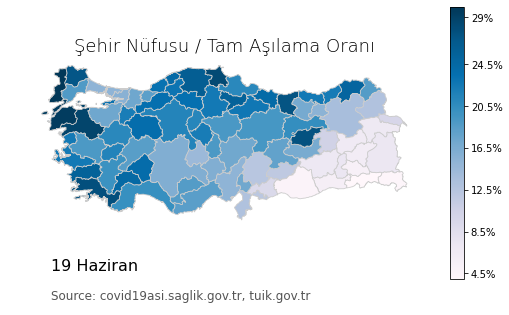

In [26]:
# Setting up a variable that will call whatever column we want to visualise on the map
variable = 'percentage'

# Set the range for the choropleth
vmin, vmax = round(asilananlar_df.percentage.min()), round(asilananlar_df.percentage.max())

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(9, 5), facecolor=(1, 1, 1))

# Remove the axis
ax.axis('off')

# Add a title
ax.set_title('Şehir Nüfusu / Tam Aşılama Oranı', fontdict={'fontsize': '18', 'fontweight' : '3'})

# Create an annotation for the data source
ax.annotate(
    f'{date[0]} {date[1]}', 
    xy=(0.1, .18), 
    xycoords='figure fraction', 
    horizontalalignment='left', 
    verticalalignment='top', 
    fontsize=16, 
    color='black')

ax.annotate(
    'Source: covid19asi.saglik.gov.tr, tuik.gov.tr', 
    xy=(0.1, .08), 
    xycoords='figure fraction', 
    horizontalalignment='left', 
    verticalalignment='top', 
    fontsize=12, 
    color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='PuBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbar = fig.colorbar(sm, pad=0.05, ticks=[4.5, 8.5, 12.5, 16.5, 20.5, 24.5, 29])
cbar.ax.set_yticklabels(['4.5%', '8.5%', '12.5%', '16.5%', '20.5%', '24.5%', '29%']) 
merged.plot(column=variable, cmap='PuBu', linewidth=0.8, ax=ax, edgecolor='0.8');

# Saving the map
fig.savefig('map_export.png', dpi=100)